### Problem 1: Logistic Regression (75+10 points)

In this problem, we’ll build a logistic regression classifier and train it on separable and non-separable data. Since it
will be specialized to binary classification, we’ve named the class logisticClassify2 .
We’ll start by building two binary classification problems, one separable and the other not:
```python
iris = np.genfromtxt("data/iris.txt",delimiter=None)
X, Y = iris[:,0:2], iris[:,-1] # get first two features & target
X,Y = ml.shuffleData(X,Y) # reorder randomly (important later)
X,_ = rescale(X) # works much better on rescaled data

XA, YA = X[Y<2,:], Y[Y<2] # get class 0 vs 1
XB, YB = X[Y>0,:], Y[Y>0] # get class 1 vs 2
```
For this problem, we are focused on the learning algorithm, rather than performance — so, we will not bother
creating training and validation splits; just use all your data for training.
Note: The code uses numpy’s permute to iterate over data randomly; should avoid issues due to the default
order of the data (by class). Similarly, rescaling and centering the data may help speed up convergence as well.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

iris = np.genfromtxt("data/iris.txt",delimiter=None)
X, Y = iris[:,0:2], iris[:,-1]                  # get first two features & target
X, Y = ml.shuffleData(X, Y)                     # reorder randomly (important later)
X,_ = ml.rescale(X)                                # works much better on rescaled data
XA, YA = X[Y<2,:], Y[Y<2]                       # get class 0 vs 1
XB, YB = X[Y>0,:], Y[Y>0]                       # get class 1 vs 2

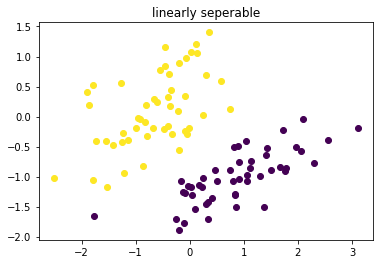

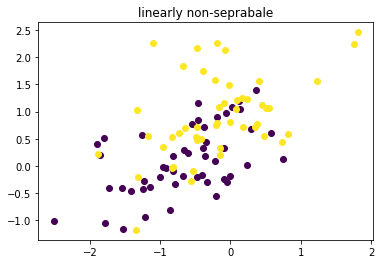

In [2]:
# 1
plt.title('linearly seperable')
ml.plotClassify2D(None,XA,YA)
plt.show()

plt.title('linearly non-seprabale')
ml.plotClassify2D(None,XB,YB)
plt.show()

```python
def plotBoundary(self,X,Y):
    """ Plot the (linear) decision boundary of the classifier, along with data """
    if len(self.theta) != 3: raise ValueError('Data & model must be 2D');
    ax = X.min(0),X.max(0); ax = (ax[0][0],ax[1][0],ax[0][1],ax[1][1]);
    x1b = np.array([ax[0],ax[1]]);  # at X1 = points in x1b
    x2b = (-self.theta[0]-self.theta[1]*x1b)/self.theta[2]  # make sure x2b is set correctly using self.theta
    ## Now plot the data and the resulting boundary:
    A = Y==self.classes[0];                   # and plot it:
    plt.plot(X[A,0],X[A,1],'b.',X[~A,0],X[~A,1],'r.',x1b,x2b,'k-'); plt.axis(ax); plt.draw();
```

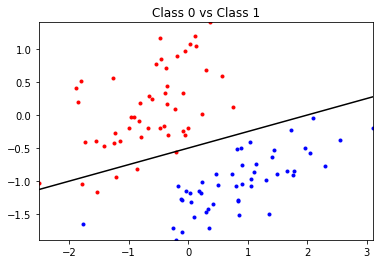

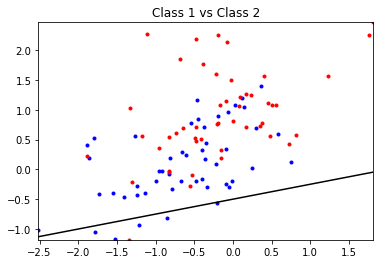

In [3]:
# 2
import logisticClassify2 as lc2

learnerA = lc2.logisticClassify2();
learnerA.classes = np.unique(YA)
wts = np.array([0.5,-0.25,1])
learnerA.theta = wts

plt.title("Class 0 vs Class 1")
learnerA.plotBoundary(XA,YA)
plt.show()


learnerB = lc2.logisticClassify2();
learnerB.classes = np.unique(YB)
wts = np.array([0.5,-0.25,1])
learnerB.theta = wts

plt.title("Class 1 vs Class 2")
learnerB.plotBoundary(XB,YB)
plt.show()

```python
def predict(self, X):
    """ Return the predictied class of each data point in X"""
    ## TODO: compute linear response r[i] = theta0 + theta1 X[i,1] + theta2 X[i,2] + ... for each i
    ## TODO: if z[i] > 0, predict class 1:  Yhat[i] = self.classes[1]
    ##       else predict class 0:  Yhat[i] = self.classes[0]
    Z = self.theta[0] + X.dot(self.theta[1:])
    Yhat = np.asarray(self.classes)[(Z > 0).astype(int)]
    return Yhat
```

In [4]:
# 3A

learnerA = lc2.logisticClassify2()
learnerA.classes = np.unique(YA)
learnerA.theta = np.array( [0.5,-0.25,1] )
learnerA.err(XA, YA)

0.050505050505050504

In [5]:
# 3B

learnerB = lc2.logisticClassify2()
learnerB.classes = np.unique(YB)
learnerB.theta = np.array( [0.5,-0.25,1] )
learnerB.err(XB, YB)

0.46464646464646464

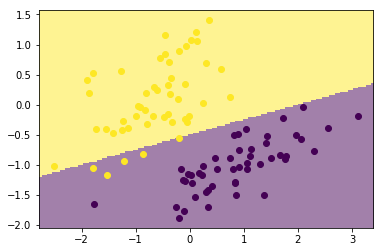

In [6]:
# 4A
ml.plotClassify2D(learnerA,XA,YA) 
plt.show()

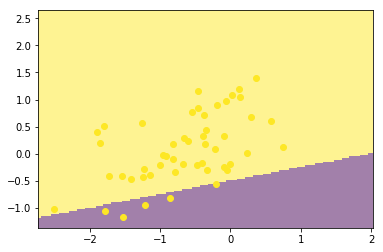

In [7]:
# 4B
ml.plotClassify2D(learnerA,XB,YB) 
plt.show()

### 5
<img src="./proof.jpeg" width="600px" height="600px" style="transform:rotate(-90deg)"></img>

### 6

```python
def train(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None):
    """ Train the logistic regression using stochastic gradient descent """
    M,N = X.shape;                     # initialize the model if necessary:
    self.classes = np.unique(Y);       # Y may have two classes, any values
    XX = np.hstack((np.ones((M,1)),X)) # XX is X, but with an extra column of ones
    YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1
    if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
    # init loop variables:
    epoch=0; done=False; Jnll=[]; J01=[];
    while not done:
        stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; # update stepsize
        # Do an SGD pass through the entire data set:
        for i in np.random.permutation(M):
            ri = 1.0 / (1.0 + np.exp(-XX[i].dot(self.theta))) # TODO: compute linear response r(x)
            gradi = -(1-ri)*XX[i,:] if YY[i] else ri*XX[i,:];     # TODO: compute gradient of NLL loss
            self.theta -= stepsize * gradi;  # take a gradient step

        J01.append( self.err(X,Y) )  # evaluate the current error rate

        ## TODO: compute surrogate loss (logistic negative log-likelihood)
        ##  Jsur = sum_i [ (log si) if yi==1 else (log(1-si)) ]
        S = 1.0/(1.0+np.exp(-(XX.dot(self.theta))))
        Jsur = -np.mean(YY*np.log(S)+(1-YY)*np.log(1-S))
        Jnll.append( Jsur ) # TODO evaluate the current NLL loss


        ## For debugging: you may want to print current parameters & losses
        # print self.theta, ' => ', Jnll[-1], ' / ', J01[-1]
        # raw_input()   # pause for keystroke

        # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
        done = epoch>=stopEpochs or (epoch>1 and abs(Jnll[-1]-Jnll[-2])<stopTol);   # or if Jnll not changing between epochs ( < stopTol )
    plt.figure(1); plt.plot(Jnll,'b-',J01,'r-'); plt.draw();    # plot losses
    if N==2: plt.figure(2); self.plotBoundary(X,Y); plt.draw(); # & predictor if 2D
    plt.pause(.01);  
```

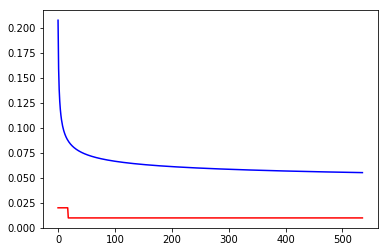

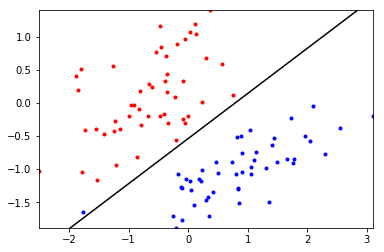

Training error rate:  0.010101010101010102


In [8]:
# 7A
learnerA = lc2.logisticClassify2()
learnerA.theta = np.array([0.,0.,0.]);
learnerA.train(XA,YA,initStep=1e-1,stopEpochs=2000,stopTol=1e-5);
print("Training error rate: ",learnerA.err(XA,YA))

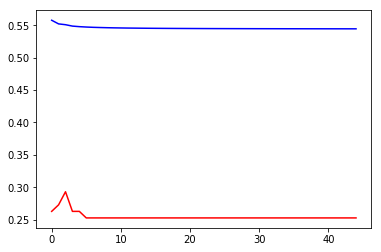

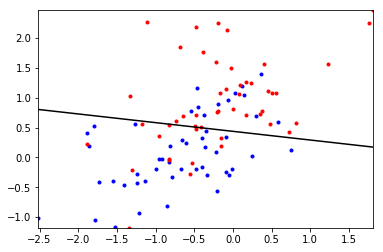

In [9]:
# 7B
learnerB = lc2.logisticClassify2()
learnerB.theta = np.array([0.,0.,0.]);
learnerB.train(XB,YB,initStep=1e-1,stopEpochs=2000,stopTol=1e-5);

The change from before is to decrease the gradient 2 * alpha & theta
```python
def l2train(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None, alpha=0.0):
    """ Train the logistic regression using stochastic gradient descent """
    M,N = X.shape;                     # initialize the model if necessary:
    self.classes = np.unique(Y);       # Y may have two classes, any values
    XX = np.hstack((np.ones((M,1)),X)) # XX is X, but with an extra column of ones
    YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1
    if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
    # init loop variables:
    epoch=0; done=False; Jnll=[]; J01=[];
    while not done:
        stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; # update stepsize
        # Do an SGD pass through the entire data set:
        for i in np.random.permutation(M):
            ri = 1.0 / (1.0 + np.exp(-XX[i].dot(self.theta))) # TODO: compute linear response r(x)
            gradi = -(1-ri)*XX[i,:] if YY[i] else ri*XX[i,:];     # TODO: compute gradient of NLL loss
            gradi += 2.0*alpha*self.theta
            self.theta -= stepsize * gradi;  # take a gradient step

        J01.append( self.err(X,Y) )  # evaluate the current error rate

        ## TODO: compute surrogate loss (logistic negative log-likelihood)
        ##  Jsur = sum_i [ (log si) if yi==1 else (log(1-si)) ]
        S = 1.0/(1.0+np.exp(-(XX.dot(self.theta))))
        Jsur = -np.mean(YY*np.log(S)+(1-YY)*np.log(1-S))
        Jnll.append( Jsur ) # TODO evaluate the current NLL loss


        ## For debugging: you may want to print current parameters & losses
        # print self.theta, ' => ', Jnll[-1], ' / ', J01[-1]
        # raw_input()   # pause for keystroke

        # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
        done = epoch>=stopEpochs or (epoch>1 and abs(Jnll[-1]-Jnll[-2])<stopTol);   # or if Jnll not changing between epochs ( < stopTol )
    plt.figure(1); plt.plot(Jnll,'b-',J01,'r-'); plt.draw();    # plot losses
    if N==2: plt.figure(2); self.plotBoundary(X,Y); plt.draw(); # & predictor if 2D
    plt.pause(.01);  
```

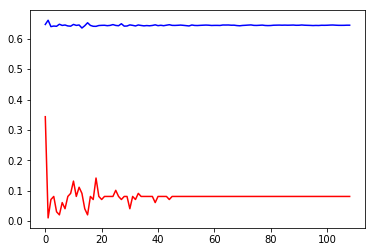

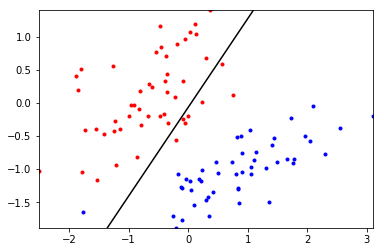

Training error rate:  0.08080808080808081


In [10]:
# 8A
learnerA = lc2.logisticClassify2()
learnerA.theta = np.array([0.,0.,0.]);
learnerA.l2train(XA,YA,initStep=1e-1,stopEpochs=1000,stopTol=1e-5,alpha=2.0);
print("Training error rate: ",learnerA.err(XA,YA))

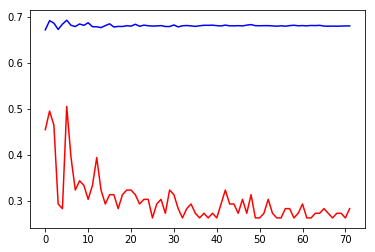

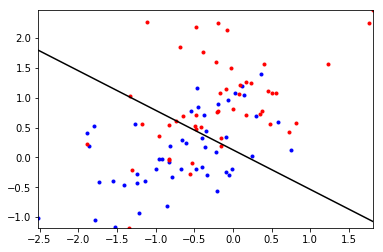

Training error rate:  0.2828282828282828


In [11]:
# 8B
learnerB = lc2.logisticClassify2()
learnerB.theta = np.array([0.,0.,0.])
learnerB.l2train(XB,YB,initStep=1e-1,stopEpochs=1000,stopTol=1e-5,alpha=2.0)
print("Training error rate: ",learnerB.err(XB,YB))

### Problem 2: Shattering and VC Dimension (20 points)

![](./vc.jpg)

Consider the data points in Figure 1 which have two real-valued features x1
, x2
. We are also giving a few learners
below. For the learners below, T[z] is the sign threshold function, T[z] = +1 for z ≥ 0 and T[z] = −1 for z < 0.
The learner parameters a, b,c, . . . are real-valued scalars, and each data point has two real-valued features x1
, x2
.
Which of the four datasets can be shattered by each learner? Give a brief explanation/justification and use your
results to guess the VC dimension of the classifier (you do not have to give a formal proof, just your reasoning).

#### 1

We can use the linear classifier to classify the (a) and (b) because (a) has 1 point and (b) has 2 points. So we can just use x1 to classify, even though they are the same or not. But in (c) and (d), the points are more than 2, for (c), the Y might be -1, +1, -1 or +1, -1, +1, so we cannot seperate the -1 and +1. Similarly, for the (d).

The VC dimension is 2

#### 2

The T( (a ∗ b)x1 + (c/a)x2) is a line cross (0, 0). (a) and (b) are classified. But if the points (2, 2) is -1 and (4, 8) is +1, and the new added point(6, 4) is -1 the same as (2, 2). Then (c) can not classified properly. The same reason as (d).

The VC dimension is 2

#### 3

The T( (x1 − a)^2 + (x2 − b)^2 + c) is a circle, (a) and (b) and (c) can be classified properly. For example in (d), if (6, 4) is -1 and the other 3 points are +1, we cannot find a circle to classify.

The VC dimension is 3

#### 4

The two equations are two parallel lines. So all the (a)(b)(c)(d) can be classified properly.

The VC dimension >= 4. 

### Statement of Collaboration

I did my homework independently.